# Stock Price Prediction Using Ensemble Learning

In this project, I utilize ensemble learning techniques to predict the stock prices of Tesla (TSLA). Ensemble methods like Bagging and AdaBoost are leveraged to create predictive models using historical stock data. The goal is to compare the performance of these models in terms of their predictive accuracy measured by the mean squared error (MSE).


In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


## Data Collection

The first step is to collect historical stock price data. I am using the `yfinance` library to fetch the data for Tesla (TSLA) from the beginning of 2018 to the end of 2023.


In [16]:
# Override the default pandas data reader method with yfinance
yf.pdr_override()

In [3]:
# Define the stock we're interested in
ticker = 'TSLA'

# Fetch stock data
data = pdr.get_data_yahoo(ticker, start="2018-01-01", end="2023-01-01")

# Predict the adjusted closing price
target = 'Adj Close'

[*********************100%***********************]  1 of 1 completed


## Data Preparation

Here, I prepare the data for our model. This involves creating lagged features which are historical stock prices used to predict future prices. Missing values are dropped to maintain data integrity.

Predicting the Adjusted Closing Price, so we set it as our target variable.


In [4]:
# Prepare the features (lagged values)
data['Lag1'] = data[target].shift(1)
data['Lag2'] = data[target].shift(2)

# Remove NA
data = data.dropna()

In [5]:
# Features and target
X = data[['Lag1', 'Lag2']]
y = data[target]

## Feature Selection and Train-Test Split

I select the lagged variables as features and the Adjusted Close price as the target. The dataset is then split into training and test sets, with the test set comprising 30% of the data. Notably, I use a non-shuffled split to maintain the time series order.


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

## Bagging Ensemble Model

The Bagging ensemble method combines predictions from multiple decision tree regressors to improve the model's accuracy. I fit the model on the training set and then make predictions on the test set.


In [7]:
# Bagging # Initialize the Bagging Regressor with 100 base estimators

bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)

In [8]:
# Make predictions
bagging_pred = bagging.predict(X_test)


In [9]:
# Calculate mean squared error
bagging_mse = mean_squared_error(y_test, bagging_pred)
print("Bagging MSE: ", bagging_mse)

Bagging MSE:  1276.9454838060062


## AdaBoost Ensemble Model

Similarly, the AdaBoost ensemble method is used to enhance the predictions.It adjusts the weights of the decision trees in an iterative process to improve model performance. Again, I train the model on the training data and evaluate it using the test set.


In [10]:
# AdaBoost
boosting = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)
boosting.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)

In [11]:
# Make predictions
boosting_pred = boosting.predict(X_test)


In [12]:
# Calculate mean squared error
boosting_mse = mean_squared_error(y_test, boosting_pred)
print("Boosting MSE: ", boosting_mse)

Boosting MSE:  1191.8472587866536


## Visualization of Predictions

Visualizing the real vs. predicted prices and the residuals for both models provides insights into their performance. Below are the plots for the Bagging and AdaBoost models.


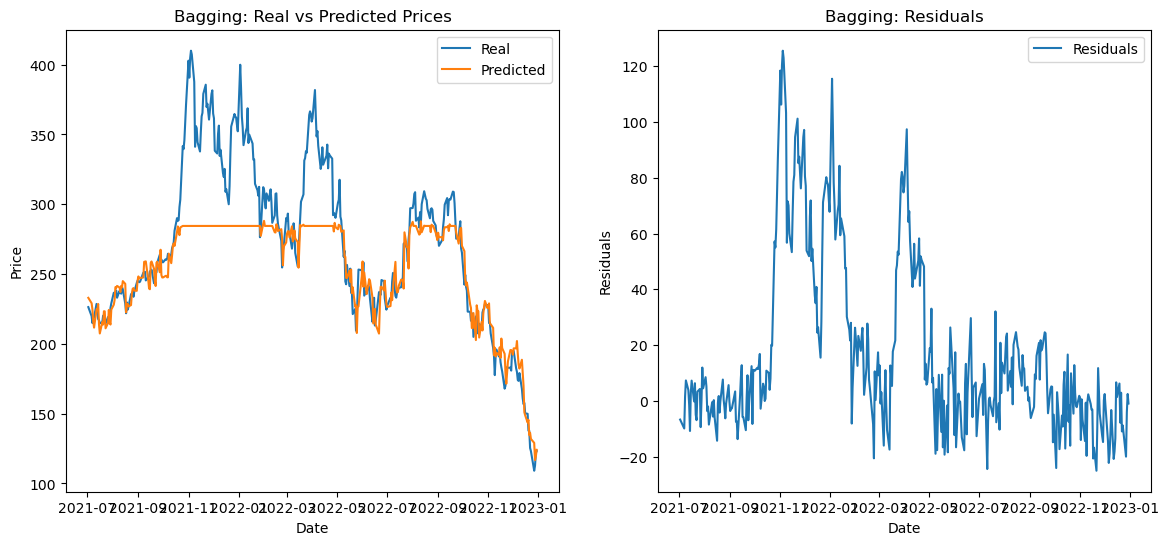

In [13]:
import matplotlib.pyplot as plt

# Plot for Bagging
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(y_test.index, y_test, label='Real')
plt.plot(y_test.index, bagging_pred, label='Predicted')
plt.title('Bagging: Real vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(1,2,2)
plt.plot(y_test.index, y_test - bagging_pred, label='Residuals')
plt.title('Bagging: Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()

plt.show()

## Real vs. Predicted Prices:

These plots are designed to show how closely the predicted stock prices from each model follow the actual stock prices over time.
The 'Real' line represents the actual adjusted closing prices of the stock, while the 'Predicted' line shows the prices as forecasted by the models.
Ideally, if a model's predictions were perfect, the 'Predicted' line would overlap completely with the 'Real' line.

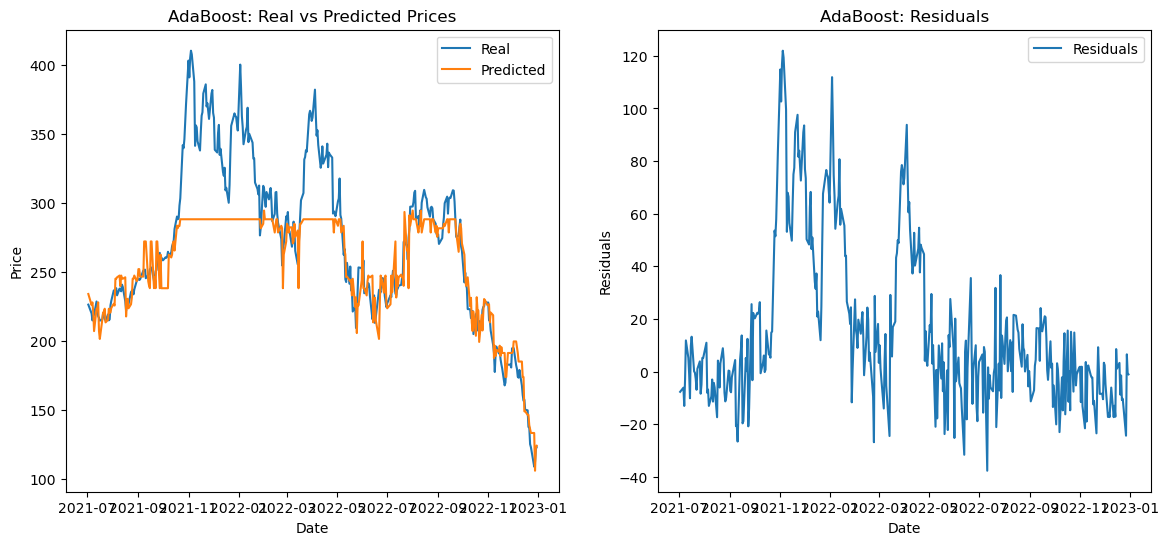

In [14]:
# Plot for AdaBoost
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(y_test.index, y_test, label='Real')
plt.plot(y_test.index, boosting_pred, label='Predicted')
plt.title('AdaBoost: Real vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(1,2,2)
plt.plot(y_test.index, y_test - boosting_pred, label='Residuals')
plt.title('AdaBoost: Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()

plt.show()

## Residuals:

Residual plots show the difference between the real stock prices and the predicted prices at each point in time, which is essentially the error of the prediction.
The residuals are plotted against the date to see if there's any pattern in how the prediction error changes over time.
A well-performing model would have residuals scattered randomly around the zero line, with no obvious patterns or trends. This would indicate that the model's errors are not systematic and are due to random fluctuations in the data.

## Conclusion

The mean squared errors of the Bagging and AdaBoost models provide a quantitative measure of their prediction accuracy. In this case, AdaBoost performs slightly better than Bagging. The residual plots help to visualize the distribution of prediction errors over time. This analysis demonstrates the effectiveness of ensemble methods in stock price prediction.

#### Model Performance: 
The mean squared error (MSE) is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better. Based on the MSE values provided, neither model perfectly predicts the stock price, but they do provide a certain level of prediction accuracy. AdaBoost performed slightly better than Bagging in this case, indicating it may be a more suitable model for this particular prediction task.

#### Prediction Quality: 
The visualizations, if showing a close following of the predicted to the real stock prices, suggest that the models have some degree of predictive power. However, the extent of this power and its practical usefulness would need to be evaluated against other models and baseline predictions.

#### Residuals Analysis: 
The residual plots are crucial for understanding model performance over time. Ideally, the residuals should be distributed randomly around the zero line without any discernible patterns. If the residual plots show systematic deviations from zero, this could indicate model biases or missing factors that influence stock prices.

#### Stock Volatility:
If the residual plots show large fluctuations, this may reflect the inherent volatility in Tesla's stock price, which can be driven by various factors like market sentiment, news, technological advancements, and financial performance. The residuals might indicate periods of higher unpredictability that the model cannot capture.

#### Underlying Data:
The analysis is based on only two lagged features (Lag1 and Lag2), which suggests a simple model. In the real world, stock prices are affected by many complex, interrelated factors, including macroeconomic indicators, industry trends, company performance, and more. Therefore, the analysis may benefit from incorporating a wider array of features.

#### Model Limitations: 
The analysis demonstrates the effectiveness of ensemble methods but also points to their limitations. The lack of positive residuals across the y-axis may indicate that there are aspects of the stock's behavior that the model is consistently missing. This could be due to overfitting, underfitting, or not accounting for non-linear relationships in the data.

#### Future Performance:
It is important to note that past performance is not indicative of future results, especially in the stock market. While the models may have predictive power on past data, their ability to forecast future stock prices may be limited, particularly in the face of unforeseen events or changes in market conditions.


## Improvements:

If the model consistently underpredicts or overpredicts, it might be worthwhile to examine the features used for predictions, the model parameters, or try different modeling techniques.
Additionally, it could be useful to investigate whether there are any external factors or patterns that are not captured by the lagged price features, which could be leading to systematic errors in prediction.